# Processing -MNIST Fashion 

Fashion-MNIST database of fashion articles.
Dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images

Labels
Each training and test example is assigned to one of the following labels:
0 T-shirt/top  1 Trouse  2 Pullover  3 Dress   4 Coat
5 Sandal       6 Shirt   7 Sneaker   8 Bag     9 Ankle boot 


Each row is a separate image
Column 1 is the class label.
Remaining columns are pixel numbers (784 total).
Each value is the darkness of the pixel (1 to 255)

In [1]:
# loading libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt


In [2]:
# load dataset
#   Training data
df_training = pd.read_csv('C:\\Users\\rivas\\OneDrive\\Documents\\JMR\\Education\\Springboard\\Projects\\Capstone1\\fashionmnisttrain.csv')

#   split data table into data Features (x) and class labels (y)
xdf_train = df_training.iloc[:, 1:]
ydf_train = df_training.iloc[:, :1]
print('Features: ',xdf_train.shape, ' Labels: ',ydf_train.shape)

Features:  (60000, 784)  Labels:  (60000, 1)


In [3]:
#   Test data
#   split data table into data Features (x) and class labels (y)
df_test = pd.read_csv('C:\\Users\\rivas\\OneDrive\\Documents\\JMR\\Education\\Springboard\\Projects\\Capstone1\\fashionmnisttest.csv')

#   split data table into data Features (x) and class labels (y)
xdf_test = df_test.iloc[:, 1:]
ydf_test = df_test.iloc[:, :1]
print('Features: ',xdf_test.shape, ' Labels: ',ydf_test.shape)

Features:  (10000, 784)  Labels:  (10000, 1)


In [4]:
#   Convert to numpy array
X_train = xdf_train.as_matrix()
y_train = ydf_train.as_matrix()
X_test = xdf_test.as_matrix()
y_test = ydf_test.as_matrix()

# Reshape array
y2_train = np.ravel( y_train[ : , 0] ) 
y2_test = np.ravel( y_test[ : , 0] ) 

#
print(X_train.shape, y2_train.shape)

(60000, 784) (60000,)


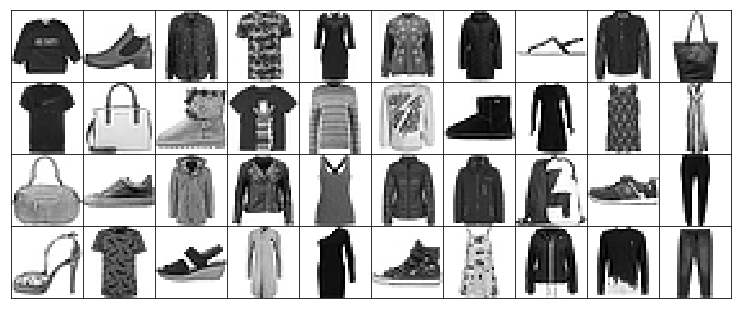

In [6]:
# Visual EDA
# Define function imshow - Sets up plot for a subset of the data
def imshow(image_set, nrows=4, ncols=10, figsize=(12.5, 5)):
    plot_num = nrows * ncols
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10*nrows/ncols))
    plt.tight_layout(False)
    fig.subplots_adjust(wspace=0, hspace=0, left=0, right=1, bottom=0, top=1)
    ax = ax.ravel()
    for i in range(plot_num):
        ax[i].imshow(-image_set[i].reshape(28, 28), cmap="gray")
        ax[i].set_xticks([])
        ax[i].set_yticks([])

# plot sample of images
imshow(X_train)
plt.show()

Reduce the dimensionality of a data set. To be able to process large datasets used
principal component analysis (PCA) to reduce the dimensionality of a data set.
This is an Unsupervised clustering algorithm.

Two main usage are
  increase speed of learning algorithms
   data visualization

reference for PCA:
https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [7]:
"""
Standardize the Data
PCA is effected by scale so you need to scale the features in your data before applying PCA.
Use StandardScaler to help you standardize the dataset’s features onto
unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance
of many machine learning algorithms. 
"""
# Standardizing
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X_train)

C:\Users\rivas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [8]:
# PCA in scikit-learn  
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)

Explained Variance
The explained variance tells you how much information
(variance) can be attributed to each of the principal components.

When reducing dimensionality you lose some of the variance (information).

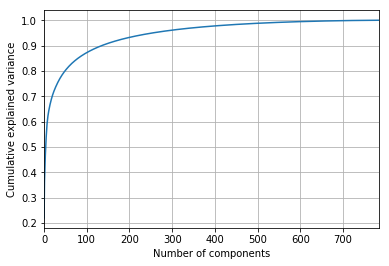

In [9]:
# Plot to find the best Number of components to use
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,784,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.grid(True)
plt.show()

The above plot shows
    ~80% variance for 50 components
    ~88% variance for 100 components
    ~94% variance for 200 components
    ~96% variance for 300 components

In [10]:
"""
We wil use 50 components  for the PCA to reduce the dimensionality
"""
#
#**********************************************
# PCA - Using 50 components for training data
sklearn50_pca = PCA(n_components=50)
X_50 = sklearn50_pca.fit_transform(X_std)
print(X_50.shape)

(60000, 50)


In [11]:
#**********************************************
# Test data - Using 50 components
X_std = StandardScaler().fit_transform(X_test)
pca = PCA().fit(X_std)
sklearn50_pca = PCA(n_components=50)
Xtest_50 = sklearn50_pca.fit_transform(X_std)
print(Xtest_50.shape)

C:\Users\rivas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(10000, 50)


C:\Users\rivas\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\rivas\Anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\Users\rivas\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


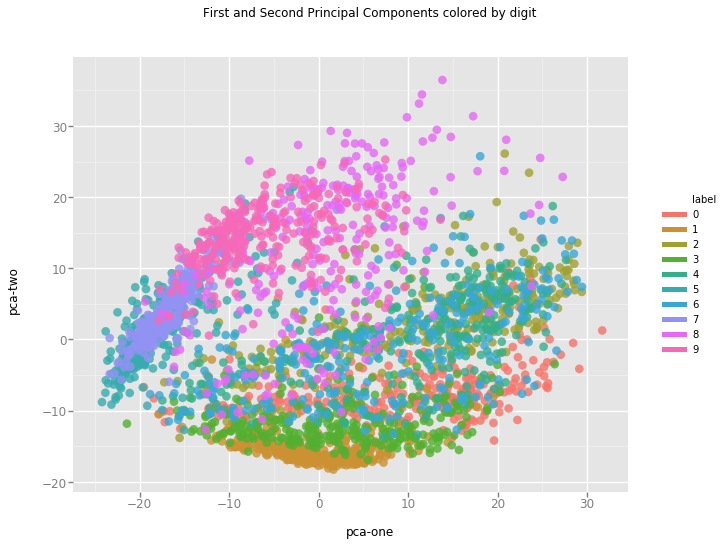

<ggplot: (126473686571)>

In [12]:
# Plot first two components to get  better understanding of the dataset
from ggplot import *
feat_cols = [ 'pixel'+str(i) for i in range(X_train.shape[1]) ]
df = pd.DataFrame(X_train,columns=feat_cols)
df['label'] = y2_train
df['label'] = df['label'].apply(lambda i: str(i))

rndperm = np.random.permutation(df.shape[0])

df['pca-one'] = X_50[:,0]
df['pca-two'] = X_50[:,1]
chart = ggplot( df.loc[rndperm[:3000],:], aes(x='pca-one', y='pca-two', color='label') ) \
        + geom_point(size=75,alpha=0.8) \
        + ggtitle("First and Second Principal Components colored by digit")
chart

The two components represent about 40% Cumulative explained variance
From the graph you can see the clustering, but not enought to set them apart.

We will use the 50 components ~80% variance for our predictive model

Used Supervised learning models , since all the data is labeled.

In [13]:
# Random Forest Classifier
# 1 - Import the model
from sklearn.ensemble import RandomForestClassifier

In [14]:
# 2 - Make an instance of the Model
RF_clf = RandomForestClassifier(n_jobs=2, random_state=0)

In [15]:
# 3 - Training the model: Using PCA 50 (X_50) for training data
# Model is learning the relationship between features and labels
#     fitting the model
RF_clf.fit(X_50, y2_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [16]:
# 4 - Predict the response
RF_clf_predict = RF_clf.predict(Xtest_50)

In [17]:
# 5 - Evaluate accuracy
#     loading libraries
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

print ('Accuracy:', accuracy_score(y2_test, RF_clf_predict))

Accuracy: 0.6858


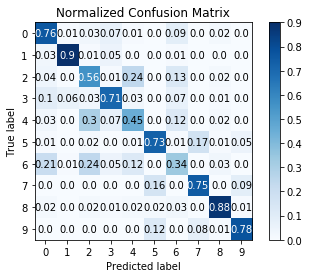

In [18]:
# plot normalized confusion matrix 
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y2_test, RF_clf_predict, normalize=True)
plt.show()

After evaluating othe models 
Based on performance and accuracy will use the Random Forest model with PCA-50.

But first we optimized for best performance.  For detail code
Fine_tuning_RF.ipynb

Hyperparameter tuning relies more on experimental results than theory, and thus the best method to determine the optimal settings is to try many different combinations evaluate the performance of each model

After optimizing the model we choose to run the model with key parameters:
    {'max_depth': 50, 'max_features': 'auto', 'n_estimators': 1400}
    
    For detail code:
    Fine_tuning_RF.ipynb
    https://github.com/rivasjmr/Springboard/blob/master/Fine_tuning_RF.ipynb
    
    

In [19]:
# Establish new model with best parameters
# {'max_depth': 50, 'max_features': 'auto', 'n_estimators': 1400}
new_model = RandomForestClassifier(max_depth=50, max_features='auto', n_estimators=1400,n_jobs=-1, random_state=42 )
new_model.fit(X_50, y2_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1400, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [21]:
new_model_predict = new_model.predict(Xtest_50)

Compare Accurracy of both models

In [22]:
print ('Base Model Accuracy:', accuracy_score(y2_test, RF_clf_predict))
print ('New Model Accuracy :', accuracy_score(y2_test, new_model_predict))

Base Model Accuracy: 0.6858
New Model Accuracy : 0.7734


We have gone through the process of identifying the best data preparation and model to process images and classify them.